# BurnupHistory Usage

In [1]:
from scale.olm.core import BurnupHistory
import matplotlib.pyplot as plt
import json

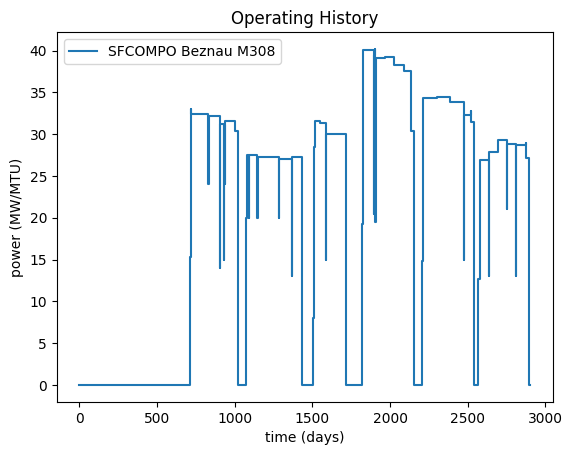

In [12]:
# Initialize with real data.
time0, burnup0 = BurnupHistory._testing_data_sfcompo1()
bh = BurnupHistory(time0, burnup0)
bh.plot_power_history(label='SFCOMPO Beznau M308')
plt.xlabel('time (days)')
plt.ylabel('power (MW/MTU)')
plt.title('Operating History')
plt.show()

In [13]:
# Find the cycles.
x = bh.classify_operations(min_shutdown_time=10.0)
if False:
    print(json.dumps(x,indent=4))
for op in x['operations']:
    if op['cycle'] !="":
        print('cycle',op['cycle'],'goes from interval',op['start'],'to interval',op['end'])

cycle 1 goes from interval 2 to interval 17
cycle 2 goes from interval 18 to interval 34
cycle 3 goes from interval 35 to interval 43
cycle 4 goes from interval 44 to interval 55
cycle 5 goes from interval 56 to interval 67
cycle 6 goes from interval 68 to interval 80


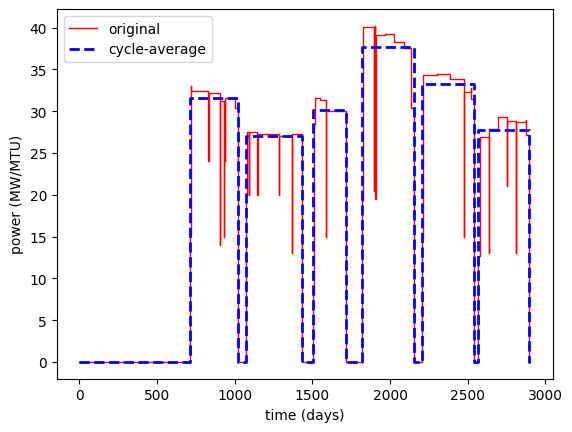

In [15]:
# Plot the original power history and a simplified cycle-by-cycle.
bh.plot_power_history(label='original')

new_time = bh.get_cycle_time(x)
bh2 = bh.regrid(new_time)
bh2.plot_power_history(label='cycle-average',add_to_existing=True)

lines = plt.gca().lines
plt.setp(lines[0], linestyle='-', color='red', linewidth=1)
plt.setp(lines[1], linestyle='dashed', color='blue', linewidth=2)
plt.xlabel('time (days)')
plt.ylabel('power (MW/MTU)')
plt.legend()
plt.show()

In [5]:
print("original final burnup and time",bh.burnup[-1], bh.time[-1])
print("new final burnup and time (same)", bh2.burnup[-1], bh2.time[-1] )

original final burnup and time 58854 2903.3
new final burnup and time (same) 58854.0 2903.3
